<a href="https://colab.research.google.com/github/tulitrip/DS_ML-coding-challenge/blob/main/Tulika_AIML_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Compare and explain the different approaches you might have considered. (In your notebook):

After trying some basic models like Naive Forecasting and some traditional ml models like linear regression and gradient boosting I finally settled on prophet.Prophet developed by Facebook is designed specifically for time-series forecasting it was an easier and quicker way to provide forecast for the given model.

Explain the final approach you have taken and why. (In your notebook):
I choose Prophet for time-series forecasting because it's specifically designed for such tasks, automatically handles seasonality, offers flexibility for customization, provides uncertainty estimates, and is easy to use. These factors make it a suitable and efficient choice for your forecasting needs.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 1: Data Understanding and Preparation
import pandas as pd

# Load the dataset

train_df = pd.read_excel('/content/drive/MyDrive/training.xlsx')
test_df = pd.read_excel('/content/drive/MyDrive/test.xlsx')

First intial steps are for basic EDA fucntionalities

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Training Data:")
print(train_df.head())

Training Data:
  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM3           X1       A28        WHOLESALE        Large   
1        NTM2           X1        A9           DIRECT        Large   
2        NTM3           X2       A20           DIRECT        Large   
3        NTM3           X1       A18        WHOLESALE        Small   
4        NTM2           X1       A28           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder        2021-05-01         10.158  
1       Powder        2020-10-01        134.281  
2       Powder        2020-12-01         12.456  
3       Powder        2021-02-01        107.220  
4       Liquid        2020-11-01        197.763  


In [ ]:
print("\nTesting Data:")
print(test_df.head())


Testing Data:
  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM1           X1        A1           DIRECT        Small   
1        NTM1           X1       A10           DIRECT        Large   
2        NTM1           X1       A10             ECOM        Large   
3        NTM1           X1       A11           DIRECT        Large   
4        NTM1           X1        A2           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder        2021-06-21         103.68  
1       Powder        2021-06-21         155.75  
2       Powder        2021-06-21         143.02  
3       Powder        2021-06-21         139.39  
4       Powder        2021-06-21         169.42  


In [ ]:
print("\nTraining Data Shape:", train_df.shape)
print("Testing Data Shape:", test_df.shape)


Training Data Shape: (550176, 8)
Testing Data Shape: (96, 8)


In [ ]:
# Check data types and missing values in the training dataset
print("\nTraining Data Types:")
print(train_df.dtypes)
print("\nTraining Data Missing Values:")
print(train_df.isnull().sum())


Training Data Types:
ProductType                  object
Manufacturer                 object
Area Code                    object
Sourcing Channel             object
Product Size                 object
Product Type                 object
Month of Sourcing    datetime64[ns]
Sourcing Cost               float64
dtype: object

Training Data Missing Values:
ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64


In [ ]:
print("\nTraining Data Summary Statistics:")
print(train_df.describe())


Training Data Summary Statistics:
                   Month of Sourcing  Sourcing Cost
count                         550176  550176.000000
mean   2020-12-08 10:27:28.769848576     108.816793
min              2020-07-01 00:00:00    -196.070000
25%              2020-10-01 00:00:00      57.000000
50%              2020-12-01 00:00:00     132.000000
75%              2021-03-01 00:00:00     146.147000
max              2021-05-01 00:00:00   32632.500000
std                              NaN     104.390097


In [ ]:
# Unique values in categorical columns
print(train_df['ProductType'].unique())
print(train_df['Manufacturer'].unique())
print(train_df['Area Code'].unique())
print(train_df['Sourcing Channel'].unique())

['NTM3' 'NTM2' 'NTM1']
['X1' 'X2' 'X3']
['A28' 'A9' 'A20' 'A18' 'A10' 'A19' 'A29' 'A7' 'A2' 'A8' 'A4' 'A6' 'A30'
 'A35' 'A44' 'A45' 'A31' 'A25' 'A37' 'A32' 'A34' 'A46' 'A11' 'A39' 'A41'
 'A17' 'A38' 'A5' 'A22' 'A3' 'A12' 'A24' 'A36' 'A42' 'A14' 'A43' 'A33'
 'A15' 'A40' 'A21' 'A16' 'A13' 'A1' 'A23' 'A26']
['WHOLESALE' 'DIRECT' 'RETAIL' 'ECOM']


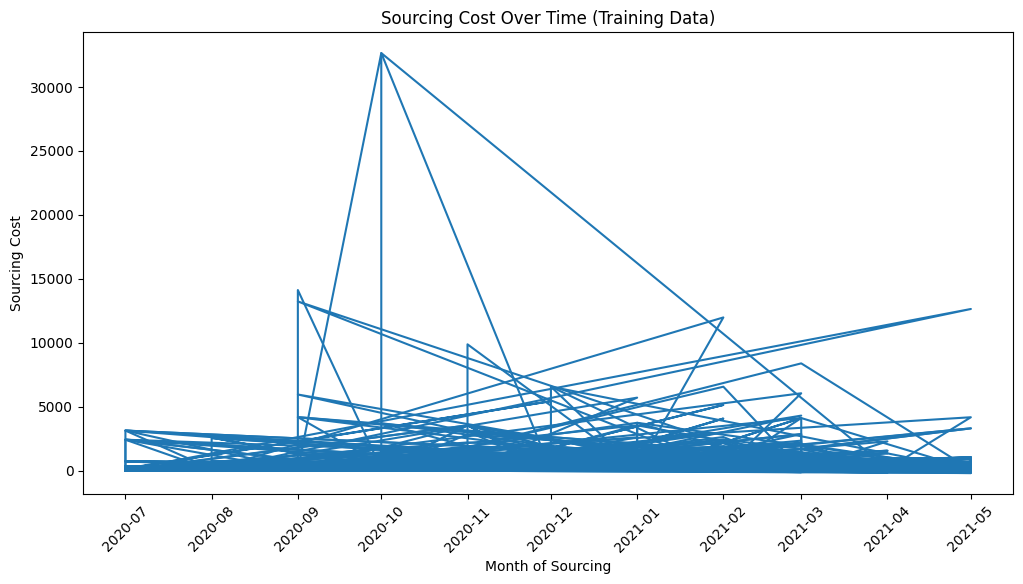

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Month of Sourcing' is the time-related column in your training dataset
plt.figure(figsize=(12, 6))
plt.plot(train_df['Month of Sourcing'], train_df['Sourcing Cost'])
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.title('Sourcing Cost Over Time (Training Data)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust path chunk size and simplify threshold to prevent OverflowError
plt.rcParams['agg.path.chunksize'] = 1000  # Set a value greater than the number of data points
plt.rcParams['path.simplify_threshold'] = 0.01  # Adjust path simplification threshold as needed

plt.show()

In [ ]:
print(test_df['ProductType'].unique())
print(test_df['Manufacturer'].unique())
print(test_df['Area Code'].unique())
print(test_df['Sourcing Channel'].unique())

['NTM1' 'NTM2' 'NTM3']
['X1' 'X2' 'X3']
['A1' 'A10' 'A11' 'A2' 'A28' 'A29' 'A3' 'A33' 'A34' 'A4' 'A6' 'A7' 'A8'
 'A9' 'A12' 'A21' 'A30' 'A31' 'A39' 'A40' 'A42' 'A43' 'A44' 'A45' 'A46'
 'A16' 'A17' 'A19' 'A23' 'A26' 'A32' 'A36' 'A37' 'A38' 'A41' 'A5' 'A25'
 'A13' 'A14' 'A15' 'A18' 'A24' 'A35' 'A20' 'A22']
['DIRECT' 'ECOM' 'RETAIL' 'WHOLESALE']


this code is preprocessing the 'Sourcing Cost' column by handling missing values and outliers using winsorization.
it provides summary statistics to assess the impact of these preprocessing steps.

In [ ]:
import pandas as pd
from scipy.stats.mstats import winsorize

# Handle missing values in the 'Sourcing Cost' column for both training and testing DataFrames
train_df['Sourcing Cost'].fillna(train_df['Sourcing Cost'].median(), inplace=True)
test_df['Sourcing Cost'].fillna(test_df['Sourcing Cost'].median(), inplace=True)

# Winsorize the 'Sourcing Cost' column in both training and testing DataFrames to handle outliers
train_df['Sourcing Cost Winsorized'] = winsorize(train_df['Sourcing Cost'], limits=[0.05, 0.05])
test_df['Sourcing Cost Winsorized'] = winsorize(test_df['Sourcing Cost'], limits=[0.05, 0.05])

# Check the summary statistics before and after winsorization for both training and testing DataFrames
print("Training Data - Summary Statistics before Winsorization:")
print(train_df['Sourcing Cost'].describe())
print("\nTraining Data - Summary Statistics after Winsorization:")
print(train_df['Sourcing Cost Winsorized'].describe())

print("\n---------------------------------------------\n")

print("Testing Data - Summary Statistics before Winsorization:")
print(test_df['Sourcing Cost'].describe())
print("\nTesting Data - Summary Statistics after Winsorization:")
print(test_df['Sourcing Cost Winsorized'].describe())

Training Data - Summary Statistics before Winsorization:
count    550176.000000
mean        108.816793
std         104.390097
min        -196.070000
25%          57.000000
50%         132.000000
75%         146.147000
max       32632.500000
Name: Sourcing Cost, dtype: float64

Training Data - Summary Statistics after Winsorization:
count    550176.000000
mean        105.983095
std          53.791803
min           5.977000
25%          57.000000
50%         132.000000
75%         146.147000
max         186.620000
Name: Sourcing Cost Winsorized, dtype: float64

---------------------------------------------

Testing Data - Summary Statistics before Winsorization:
count     96.000000
mean     106.208021
std       52.359484
min        4.140000
25%       59.662500
50%      117.245000
75%      144.915000
max      234.710000
Name: Sourcing Cost, dtype: float64

Testing Data - Summary Statistics after Winsorization:
count     96.000000
mean     105.121042
std       49.026039
min       22.620000

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [ ]:
# Check the data type of 'Sourcing Cost' column
print(train_df['Sourcing Cost'].dtype)

# Convert 'Sourcing Cost' column to numeric
train_df['Sourcing Cost'] = pd.to_numeric(train_df['Sourcing Cost'], errors='coerce')

# Ensure there are no NaN values after conversion
print(train_df['Sourcing Cost'].isnull().sum())

# Check the data types of all columns
print(train_df.dtypes)


float64
0
ProductType                         object
Manufacturer                        object
Area Code                           object
Sourcing Channel                    object
Product Size                        object
Product Type                        object
Month of Sourcing           datetime64[ns]
Sourcing Cost                      float64
Sourcing Cost Winsorized           float64
dtype: object


In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet
import pandas as pd

In [ ]:
# Data Preparation
train_df['Month of Sourcing'] = pd.to_datetime(train_df['Month of Sourcing'])
test_df['Month of Sourcing'] = pd.to_datetime(test_df['Month of Sourcing'])

In [ ]:
# Prepare dataset for Prophet
train_prophet = train_df[['Month of Sourcing', 'Sourcing Cost']].copy()
train_prophet.rename(columns={'Month of Sourcing': 'ds', 'Sourcing Cost': 'y'}, inplace=True)

model training

In [ ]:
# Model Training
model = Prophet()
model.fit(train_prophet)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpusxw024g/0ikqy0i9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpusxw024g/gohtap3u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43278', 'data', 'file=/tmp/tmpusxw024g/0ikqy0i9.json', 'init=/tmp/tmpusxw024g/gohtap3u.json', 'output', 'file=/tmp/tmpusxw024g/prophet_model_hajakkt/prophet_model-20240511162950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:29:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:30:14 - cmdstanpy - INFO - Chain

In [ ]:
# Forecasting for June 2021
future_dates = pd.DataFrame({'ds': pd.date_range(start='2021-06-01', end='2021-06-30')})
forecast = model.predict(future_dates)

In [ ]:
# Display the forecasted values
print(forecast[['ds', 'yhat']])

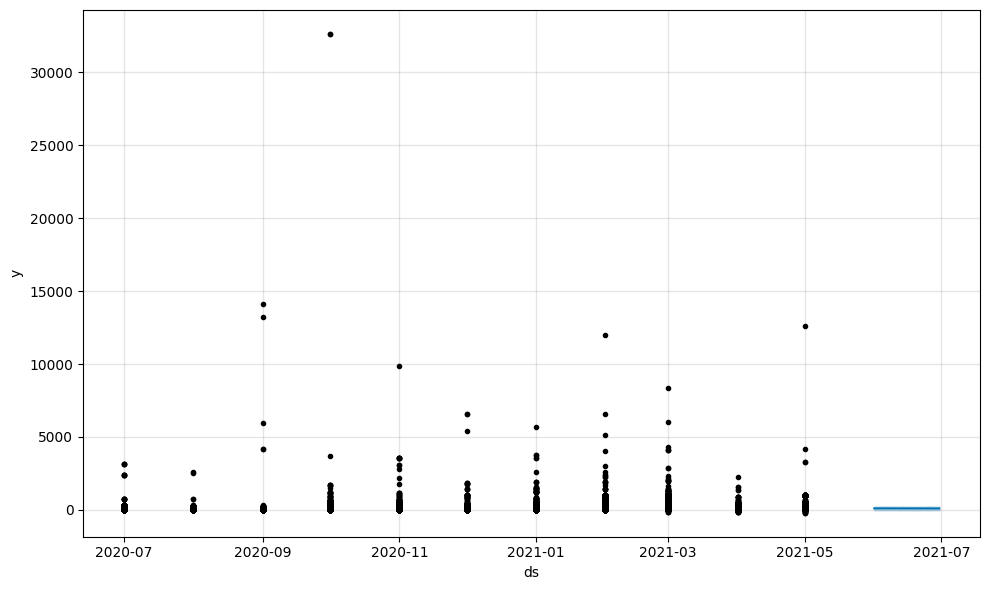

In [ ]:
# Visualization
fig = model.plot(forecast)

Final result

In [ ]:
# Merge forecasted values
forecasted_values = forecast[['ds', 'yhat']]
forecasted_values['Month of Sourcing'] = forecasted_values['ds'].dt.strftime('%b-%y')
forecasted_values.drop(columns=['ds'], inplace=True)
forecasted_values.rename(columns={'yhat': 'Sourcing Cost'}, inplace=True)
test_df['Month of Sourcing'] = 'Jun-21'  # Assuming all dates in the test set are in June 2021

# Concatenate data with forecasted values
forecasted_test_data = pd.concat([test_df], axis=1)

# Rearrange columns to match the desired format
forecasted_test_data = forecasted_test_data[['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
                                             'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost']]

# Display the forecasted test data
print(forecasted_test_data)
forecasted_test_data.to_excel('forecastedjune.xlsx', index=False)

   ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0         NTM1           X1        A1           DIRECT        Small   
1         NTM1           X1       A10           DIRECT        Large   
2         NTM1           X1       A10             ECOM        Large   
3         NTM1           X1       A11           DIRECT        Large   
4         NTM1           X1        A2           DIRECT        Large   
..         ...          ...       ...              ...          ...   
91        NTM3           X1       A44           DIRECT        Small   
92        NTM3           X1        A8           DIRECT        Large   
93        NTM3           X1        A8           DIRECT        Small   
94        NTM3           X2       A20           DIRECT        Large   
95        NTM3           X3       A22           RETAIL        Large   

   Product Type Month of Sourcing  Sourcing Cost  
0        Powder            Jun-21         103.68  
1        Powder            Jun-21         155

<ipython-input-32-b78eb47c46fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_values['Month of Sourcing'] = forecasted_values['ds'].dt.strftime('%b-%y')
<ipython-input-32-b78eb47c46fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_values.drop(columns=['ds'], inplace=True)
<ipython-input-32-b78eb47c46fb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

final sheet can be seen, /content/forecastedjune.xlsx is the forescasted excel sheet.

In [ ]:
# Merge forecasted values with testing data
forecasted_test_data = pd.concat([test_df, forecasted_values], axis=1)

# Rearrange columns to match the desired format
forecasted_test_data = forecasted_test_data[['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
                                             'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost']]

# Display the forecasted test data
print(forecasted_test_data)




   ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0         NTM1           X1        A1           DIRECT        Small   
1         NTM1           X1       A10           DIRECT        Large   
2         NTM1           X1       A10             ECOM        Large   
3         NTM1           X1       A11           DIRECT        Large   
4         NTM1           X1        A2           DIRECT        Large   
..         ...          ...       ...              ...          ...   
91        NTM3           X1       A44           DIRECT        Small   
92        NTM3           X1        A8           DIRECT        Large   
93        NTM3           X1        A8           DIRECT        Small   
94        NTM3           X2       A20           DIRECT        Large   
95        NTM3           X3       A22           RETAIL        Large   

   Product Type Month of Sourcing Month of Sourcing  Sourcing Cost  \
0        Powder            Jun-21            Jun-21         103.68   
1      